(4, 2)
(4, 2)
(80, 2)
(80, 2)


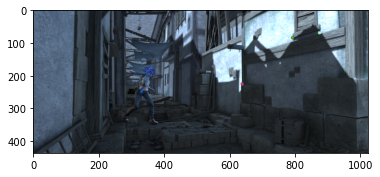

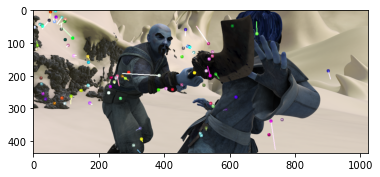

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cv2 as cv
import matplotlib.cm as cm
from scipy.signal import convolve2d

def Lucas_Kanade(inputImage1, inputImage2):
    oldInputImageFrame = cv.imread(inputImage1)
    I1 = cv.cvtColor(oldInputImageFrame, cv.COLOR_BGR2GRAY)

    newInputImageFrame = cv.imread(inputImage2)
    I2 = cv.cvtColor(newInputImageFrame, cv.COLOR_BGR2GRAY)

    inputImageColor = np.random.randint(0, 255, (100, 3))
    greyLevelX = np.reshape(np.asarray([[-1, 1], [-1, 1]]), (2, 2)) 
    greyLevelY = np.reshape(np.asarray([[-1, -1], [1, 1]]), (2, 2)) 
    Gt1 = np.reshape(np.asarray([[-1, -1], [-1, -1]]), (2, 2))  
    Gt2 = np.reshape(np.asarray([[1, 1], [1, 1]]), (2, 2)) 


    intensityX = (convolve2d(I1, greyLevelX) + convolve2d(I2, greyLevelX)) / 2
    Iy = (convolve2d(I1, greyLevelY) + convolve2d(I2, greyLevelY)) / 2
    intensityY = convolve2d(I1, Gt1) + convolve2d(I2, Gt2)  
    feature_params = dict(maxCorners=100,
                          qualityLevel=0.3,
                          minDistance=7,
                          blockSize=7)
    inputImageFeatures= cv.goodFeaturesToTrack(I1, mask = None, **feature_params)
    feature = np.int32(inputImageFeatures)
    feature = np.reshape(feature, newshape=[-1, 2])
    s = np.ones(intensityX.shape)
    t = np.ones(intensityX.shape)
    imageStatus=np.zeros(feature.shape[0])
    matrixA = np.zeros((2, 2))
    matrixB = np.zeros((2, 1))
    mask = np.zeros_like(oldInputImageFrame)
    newFeature=np.zeros_like(feature)

    for a,i in enumerate(feature):
        x, y = i
        matrixA[0, 0] = np.sum((intensityX[y - 1:y + 2, x - 1:x + 2]) ** 2)
        matrixA[1, 1] = np.sum((Iy[y - 1:y + 2, x - 1:x + 2]) ** 2)
        matrixA[0, 1] = np.sum(intensityX[y - 1:y + 2, x - 1:x + 2] * Iy[y - 1:y + 2, x - 1:x + 2])
        matrixA[1, 0] = np.sum(intensityX[y - 1:y + 2, x - 1:x + 2] * Iy[y - 1:y + 2, x - 1:x + 2])
        matrixAInverse = np.linalg.pinv(matrixA)
        matrixB[0, 0] = -np.sum(intensityX[y - 1:y + 2, x - 1:x + 2] * intensityY[y - 1:y + 2, x - 1:x + 2])
        matrixB[1, 0] = -np.sum(Iy[y - 1:y + 2, x - 1:x + 2] * intensityY[y - 1:y + 2, x - 1:x + 2])
        prod = np.matmul(matrixAInverse, matrixB)

        s[y, x] = prod[0]
        t[y, x] = prod[1]

        newFeature[a]=[np.int32(x+s[y,x]),np.int32(y+t[y,x])]
        if np.int32(x+s[y,x])==x and np.int32(y+t[y,x])==y:   
            imageStatus[a]=0
        else:
            imageStatus[a]=1

    um=np.flipud(s)
    vm=np.flipud(t)

    newImageFeature=newFeature[imageStatus==1] 
    oldImageFeature = feature[imageStatus==1]
    print(newImageFeature.shape)
    print(oldImageFeature.shape)

    # draw the tracks
    for i, (new, old) in enumerate(zip(newImageFeature, oldImageFeature)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (a, b), (c, d), inputImageColor[i].tolist(), 2)
        newInputImageFrame = cv.circle(newInputImageFrame, (a, b), 5, inputImageColor[i].tolist(), -1)
    img = cv.add(newInputImageFrame, mask)
    return img


basketball_image=Lucas_Kanade('./MPI-Sintel-complete/training/clean/alley_2/frame_0001.png', './MPI-Sintel-complete/training/clean/alley_2/frame_0002.png')
grove_image=Lucas_Kanade('./MPI-Sintel-complete/training/clean/ambush_2/frame_0001.png', './MPI-Sintel-complete/training/clean/ambush_2/frame_0002.png')

plt.imshow(basketball_image)
plt.show()
plt.imshow(grove_image)
plt.show()